In [147]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scipy as stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
print('setup com')

setup com


In [148]:
# Load the data
Titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')
Titanic_data.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S


In [149]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [150]:
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
Titanic_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [152]:
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
# Data cleaning
Titanic_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
Titanic_data['Age'].fillna(Titanic_data['Age'].median(), inplace=True)
Titanic_data.dropna(inplace=True)
Titanic_data.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,34.375,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,24.000,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.125,Q
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,26.000,S


In [154]:
round(Titanic_data.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.0,889.00,889.00,889.00,889.00,889.00,889.00
mean,446.0,0.38,2.31,29.32,0.52,0.38,32.10
std,257.0,0.49,0.83,12.98,1.10,0.81,49.70
min,1.0,0.00,1.00,0.42,0.00,0.00,0.00
25%,224.0,0.00,2.00,22.00,0.00,0.00,7.90
50%,446.0,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.0,1.00,3.00,35.00,1.00,0.00,31.00
max,891.0,1.00,3.00,80.00,8.00,6.00,512.33


In [155]:
Titanic_data.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [156]:
# Feature engineering
Titanic_data['FamilySize'] = Titanic_data['SibSp'] + Titanic_data['Parch'] + 1
Titanic_data['IsAlone'] = 1
Titanic_data['IsAlone'].loc[Titanic_data['FamilySize'] > 1] = 0
Titanic_data['Title'] = Titanic_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [157]:
Titanic_data.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
648,649,0,3,"Willey, Mr. Edward",male,28.0,0,0,7.5500,S,1,1,Mr
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,7.2292,C,1,1,Mr
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,113.2750,C,2,0,Miss
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,8.4042,S,2,0,Mr


# Data visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

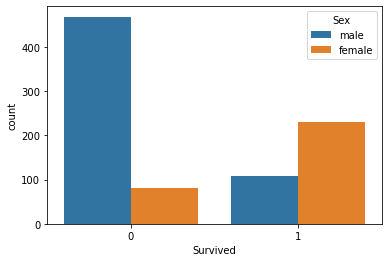

In [158]:
sns.countplot(x='Survived', data=Titanic_data,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

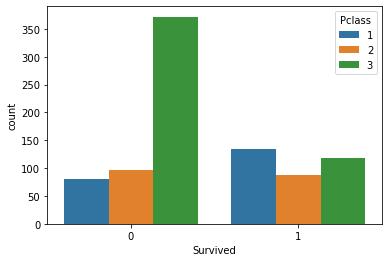

In [159]:
sns.countplot(x='Survived', hue='Pclass', data=Titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

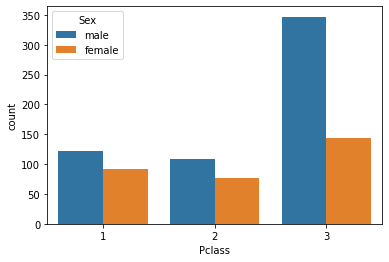

In [160]:
sns.countplot(x='Pclass', hue='Sex', data=Titanic_data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

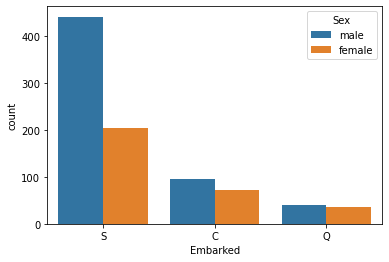

In [161]:
sns.countplot(x='Embarked',hue='Sex', data=Titanic_data)


<AxesSubplot:xlabel='Age', ylabel='Count'>

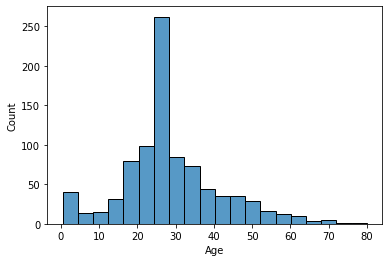

In [162]:
sns.histplot(x='Age', data=Titanic_data,bins=20)

<AxesSubplot:xlabel='Age'>

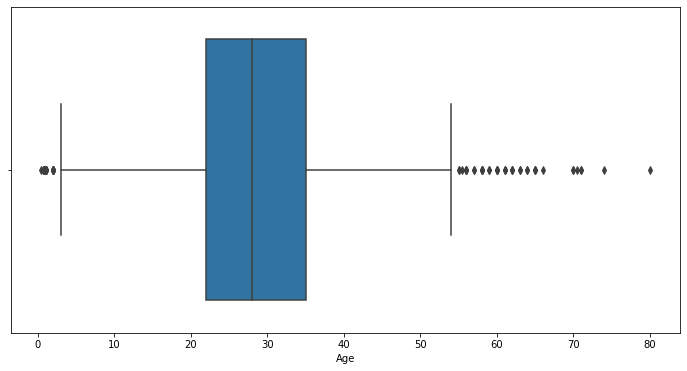

In [163]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', data=Titanic_data)

# Data prepration for modeling

In [164]:
# Convert categorical variables to numerical variables
Titanic_data_for_modeling = pd.get_dummies(Titanic_data, columns=['Sex', 'Embarked', 'Title'])

In [165]:
# Split the dataset into training and testing sets
X = Titanic_data_for_modeling.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = Titanic_data_for_modeling['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [168]:
# Evaluate the model
y_pred = log_reg.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy score:  0.8014981273408239
Confusion matrix:  [[139  28]
 [ 25  75]]
Classification report:                precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.73      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267

